
# MS2 — Data Exploration (The Movies Dataset)

**Dataset link:** https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset  


## 1. Setup

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# data path
DATA_PATH = "data/movies_metadata.csv"

movies = pd.read_csv(DATA_PATH, low_memory=False)
movies.head(3)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


## 2. How many observations?

In [2]:

print("Number of rows:", len(movies))
print("Number of columns:", movies.shape[1])


Number of rows: 45466
Number of columns: 24


## 3. columns, scales, and distributions

In [3]:

movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Continuous vs Categorical

In [4]:

continuous = ["budget", "revenue", "popularity", "vote_average", "vote_count", "runtime"]
categorical = ["original_language", "status"]

print("Continuous:", continuous)
print("Categorical:", categorical)


Continuous: ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']
Categorical: ['original_language', 'status']


## 4. Missing and duplicate values

In [5]:

missing = movies.isna().sum().sort_values(ascending=False)
duplicates = movies.duplicated(subset=["id"]).sum() if "id" in movies.columns else movies.duplicated().sum()

print("Missing values (top 10):")
print(missing.head(10))
print("\nDuplicate rows:", duplicates)


Missing values (top 10):
belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
dtype: int64

Duplicate rows: 30


## 5. Data Plots

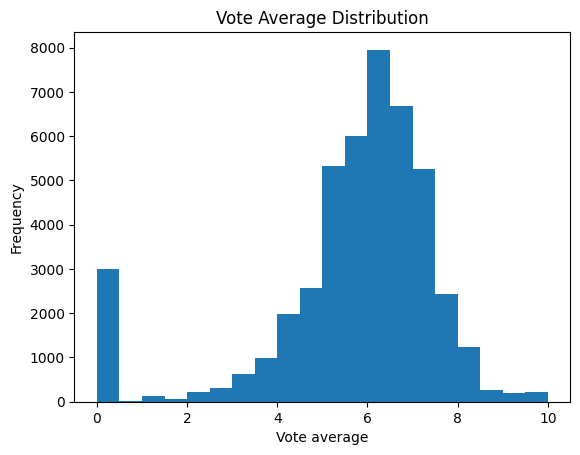

In [6]:

# Vote average distribution
va = movies["vote_average"].dropna()
plt.hist(va, bins=20)
plt.title("Vote Average Distribution")
plt.xlabel("Vote average")
plt.ylabel("Frequency")
plt.show()


_Interpretation: Ratings cluster around 6–7, typical for TMDB data._

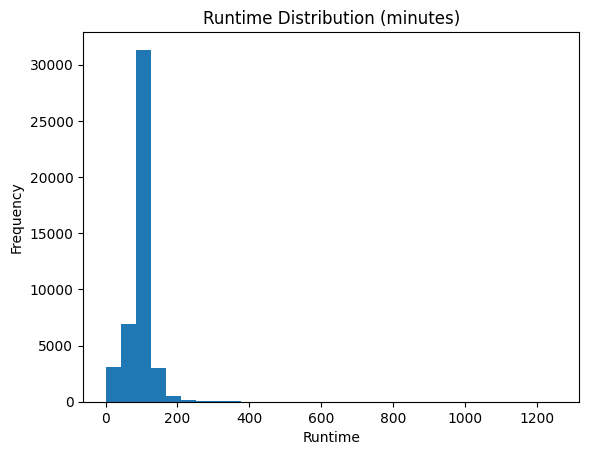

In [7]:

# Runtime distribution
rt = pd.to_numeric(movies["runtime"], errors="coerce").dropna()
plt.hist(rt, bins=30)
plt.title("Runtime Distribution (minutes)")
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.show()


_Interpretation: Most movies are 80–130 minutes, with a long tail of outliers._

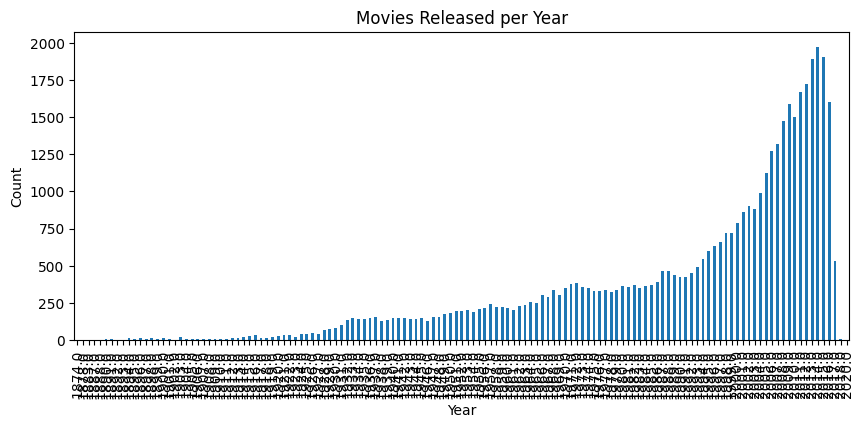

In [8]:

# Release year distribution
movies["release_date"] = pd.to_datetime(movies["release_date"], errors="coerce")
movies["release_year"] = movies["release_date"].dt.year
year_counts = movies["release_year"].value_counts().sort_index()

year_counts.plot(kind="bar", figsize=(10,4))
plt.title("Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


_Interpretation: Coverage grows over time, with dips where data is incomplete._


## 6. Preprocessing Plan

In Readme


Milestone 3

In [12]:

df = movies.copy()

cols_keep = ["budget","revenue","runtime","popularity","vote_count","vote_average",
             "release_date","original_language","genres","title"]
df = df[cols_keep].copy()

for c in ["budget","revenue","runtime","popularity","vote_count","vote_average"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["runtime"] = df["runtime"].fillna(df["runtime"].median())
df["budget"] = df["budget"].replace(0, np.nan).fillna(df["budget"].median())
df["revenue"] = df["revenue"].replace(0, np.nan).fillna(df["revenue"].median())
df["popularity"] = df["popularity"].fillna(df["popularity"].median())
df["vote_count"] = df["vote_count"].fillna(0)
df["vote_average"] = df["vote_average"].fillna(df["vote_average"].median())

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year.fillna(0).astype(int)
df["release_month"] = df["release_date"].dt.month.fillna(0).astype(int)
df["release_quarter"] = df["release_date"].dt.quarter.fillna(0).astype(int)

df["ROI"] = np.where(df["budget"] > 0, df["revenue"] / df["budget"], 0)
df["log_budget"] = np.log1p(df["budget"])
df["log_revenue"] = np.log1p(df["revenue"])

df.head(3)



,budget,revenue,runtime,popularity,vote_count,vote_average,release_date,original_language,genres,title,release_year,release_month,release_quarter,ROI,log_budget,log_revenue
0,30000000.0,373554033.0,81.0,21.946943,5415.0,7.7,1995-10-30,en,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,1995,10,4,12.451801,17.216708,19.738573
1,65000000.0,262797249.0,104.0,17.015539,2413.0,6.9,1995-12-15,en,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,1995,12,4,4.043035,17.989898,19.386893
2,0.0,0.0,101.0,11.712900,92.0,6.5,1995-12-22,en,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,1995,12,4,0.000000,0.000000,0.000000


In [13]:
import ast

# language one-hots (top 10)
top_lang = df["original_language"].fillna("unknown").value_counts().head(10).index.tolist()
for lang in top_lang:
    df[f"lang_{lang}"] = (df["original_language"] == lang).astype(int)

# genres one-hots (top 8)
def parse_genres(x):
    try:
        items = ast.literal_eval(x) if isinstance(x, str) else []
        return [d.get("name","") for d in items if isinstance(d, dict)]
    except:
        return []

glist = df["genres"].apply(parse_genres)
top_gen = pd.Series([g for L in glist for g in L if g]).value_counts().head(8).index.tolist()
for g in top_gen:
    df[f"genre_{g}"] = glist.apply(lambda L: int(g in L))

# unused
df = df.drop(columns=["original_language","genres","title","release_date"])

df.head(5)


,budget,revenue,runtime,popularity,vote_count,vote_average,release_year,release_month,release_quarter,ROI,...,lang_ko,lang_zh,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,genre_Crime,genre_Documentary
0,30000000.0,373554033.0,81.0,21.946943,5415.0,7.7,1995,10,4,12.451801,...,0,0,0,1,0,0,0,0,0,0
1,65000000.0,262797249.0,104.0,17.015539,2413.0,6.9,1995,12,4,4.043035,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,101.0,11.712900,92.0,6.5,1995,12,4,0.000000,...,0,0,0,1,0,1,0,0,0,0
3,16000000.0,81452156.0,127.0,3.859495,34.0,6.1,1995,12,4,5.090760,...,0,0,1,1,0,1,0,0,0,0
4,0.0,76578911.0,106.0,8.387519,173.0,5.7,1995,2,1,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

# target
df["success"] = ((df["ROI"] >= 1.0) & (df["vote_average"] >= 6.0)).astype(int)

# features
num_cols = ["log_budget","log_revenue","runtime","popularity","vote_count","vote_average","release_year","release_month","release_quarter","ROI"]
cat_cols = [c for c in df.columns if c.startswith("lang_") or c.startswith("genre_")]
X = df[num_cols + cat_cols].fillna(0)
y = df["success"]

# splits
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_val,   X_test, y_val,  y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0, stratify=y_tmp)

X_train.shape, X_val.shape, X_test.shape


((27279, 28), (9093, 28), (9094, 28))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = X_train.copy()
X_val_s   = X_val.copy()
X_test_s  = X_test.copy()

X_train_s[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val_s[num_cols]   = scaler.transform(X_val[num_cols])
X_test_s[num_cols]  = scaler.transform(X_test[num_cols])

X_train_s.head(3)


,log_budget,log_revenue,runtime,popularity,vote_count,vote_average,release_year,release_month,release_quarter,ROI,...,lang_ko,lang_zh,genre_Drama,genre_Comedy,genre_Thriller,genre_Romance,genre_Action,genre_Horror,genre_Crime,genre_Documentary
25466,2.213435,2.282930,0.823329,2.213142,0.876103,0.457270,0.274168,1.520042,1.293838,-0.009624,...,0,0,1,0,1,0,0,0,1,0
11275,-0.484495,-0.428995,1.090764,-0.408387,-0.211497,0.822456,-0.333444,0.143831,0.430298,-0.009632,...,0,0,1,0,0,1,0,0,0,0
11423,0.320696,-0.428995,-2.198677,0.205192,0.008422,0.770287,-0.868967,1.520042,1.293838,-0.009632,...,0,0,0,0,0,0,1,0,0,0


In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=0)
svm.fit(X_train_s, y_train)

print("Train acc:", svm.score(X_train_s, y_train))
print("Val acc:  ", svm.score(X_val_s, y_val))
print("Test acc: ", svm.score(X_test_s, y_test))

print("\nClassification report (test):")
print(classification_report(y_test, svm.predict(X_test_s)))


Train acc: 0.9881960482422376
Val acc:   0.9826239964808094
Test acc:  0.9853749725093468

Classification report (test):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8549
           1       0.87      0.89      0.88       545

    accuracy                           0.99      9094
   macro avg       0.93      0.94      0.94      9094
weighted avg       0.99      0.99      0.99      9094



In [17]:
rows = []
for C in [0.1, 1, 5, 10]:
    m = SVC(kernel="rbf", C=C, gamma="scale", random_state=0)
    m.fit(X_train_s, y_train)
    rows.append({
        "C": C,
        "train_acc": m.score(X_train_s, y_train),
        "val_acc":   m.score(X_val_s, y_val),
        "test_acc":  m.score(X_test_s, y_test)
    })
pd.DataFrame(rows)


,C,train_acc,val_acc,test_acc
0,0.1,0.978885,0.975256,0.977788
1,1.0,0.988196,0.982624,0.985375
2,5.0,0.992228,0.985263,0.987574
3,10.0,0.993841,0.986693,0.988454


## Conclusion

Our first model was an SVM with an RBF kernel. The training performed strongly, but the test accuracy showed that very small C values underfit  while very large C values tended to overfit. The best balance was around C = 1. This means the model sits near the middle of the fitting graph.

Overall, the model can classify success vs. non-success movies with reasonable accuracy. To improve further, we could:
- tune C and gamma for SVM
- try other models
- more detailed genre encoding, crew/cast information
- add to the training/testing with another dataset

The next step is to refine the features and compare multiple model types.